Text(0, 0.5, 'PSNR')

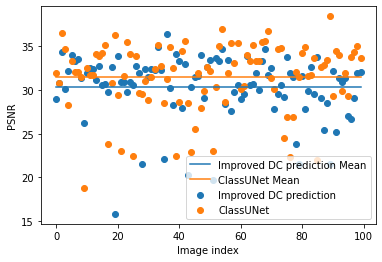

In [15]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt


def calculate_psnr(image1, image2):
    """
    Calculate the psnr between two image.
    """
    assert image1.shape == image2.shape, 'Input images must have the same dimensions {} - {}.'.format(image1.shape, image2.shape)

    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)
    mse = np.mean((image1 - image2)**2)
    if mse == 0:
        return np.float64(80)
    return 20 * math.log10(255.0 / math.sqrt(mse))

def get_psnr_list(fake_images_path, real_images_path):
    index = []
    psnrs = []
    path_list = [os.path.join(root, file) for root, _, files in os.walk(fake_images_path) for file in files]
    for i in range(100):
        basename = os.path.basename(path_list[i])
        fake_images = cv2.imread(os.path.join(fake_images_path, basename), 0)
        real_images = cv2.imread(os.path.join(real_images_path, basename.replace('.png', '.jpg')), 0)
        real_images = real_images[:fake_images.shape[0], :fake_images.shape[1]]
        psnr = calculate_psnr(fake_images, real_images)
        index.append(i)
        psnrs.append(psnr)
    
    return index, psnrs

fake_images_paths = [
    "/data/zhangjianghui/Datasets/lfw/lfw_valid_rec_50_avg_spd",
    "/data/zhangjianghui/ClassUNet_old/results/test_ClassUNet_211115-160148/LFW_test"
]
real_images_paths = [
    "/data/zhangjianghui/Datasets/lfw/lfw_valid_std_50_avg_spd",
    "/data/zhangjianghui/Datasets/lfw/lfw_valid_std_50_avg_spd"
]
legends = [
    "Improved DC prediction Mean", "ClassUNet Mean",
    "Improved DC prediction", "ClassUNet"
]
for i in range(len(fake_images_paths)):
    index, psnrs = get_psnr_list(fake_images_paths[i], real_images_paths[i])
    plt.scatter(index, psnrs)
    psnr_mean = sum(psnrs) / len(psnrs)
    plt.plot(index, psnr_mean + np.zeros(len(psnrs)))

plt.legend(legends)
plt.xlabel("Image index")
plt.ylabel("PSNR")

